<a href="https://colab.research.google.com/github/jensman100/Fast.ai-Practical-Deep-Learning-for-Coders/blob/main/Lesson_5_Creating_Model_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a Linear Model From Scratch

To understand the processes which go on behind the scenes using a ML library, this script will build a model from the ground up.  
Using kaggle's Heart Failure Prediction Dataset, the model will predict whether someone has had a heart attack.

Note: I first tried to use Stroke Prediction Dataset, however only 5% of the dataset was people who had strokes. So the model didnt train well.

Downloading and viewing the dataset...  

Visit here to see how to download kaggle dataset:

 https://www.kaggle.com/discussions/general/74235

In [2]:
! pip install -q kaggle
from google.colab import files
files.upload() # then choose downloaded API

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joeeeeeeh","key":"d4d4fa56c434a08dee070e09d504fe28"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d fedesoriano/heart-failure-prediction
!unzip heart-failure-prediction.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 4.88MB/s]
Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Tasks to complete:


*   Remove missing variables (NaN)
*   Check if any continuous variables are long tailed
* Normalise continuous variables
* Create dummies of categorical variables



In [6]:
# Checking for NaNs
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [7]:
# There are NaNs in BMI
# Going to replace with the mode BMI
modes = df.mode().iloc[0]
modes

,0
Age,54
Sex,M
ChestPainType,ASY
RestingBP,120
Cholesterol,0
FastingBS,0
RestingECG,Normal
MaxHR,150
ExerciseAngina,N
Oldpeak,0.0


In [8]:
df.fillna(modes, inplace=True) # inplace updates original

In [9]:
# Checking it has worked
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


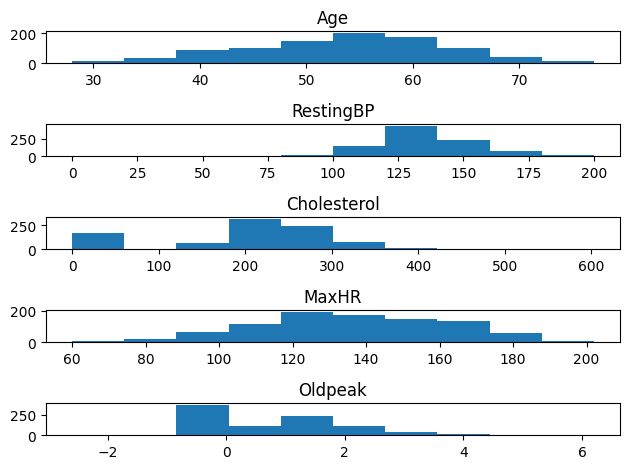

In [10]:
# Plotting histograms of continuous data to observe data
import matplotlib.pyplot as plt

continuous_col = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
fig, axs = plt.subplots(nrows = len(continuous_col))

for count, col in enumerate(continuous_col):
  axs[count].hist(df[col])
  axs[count].set_title(col)

plt.tight_layout()


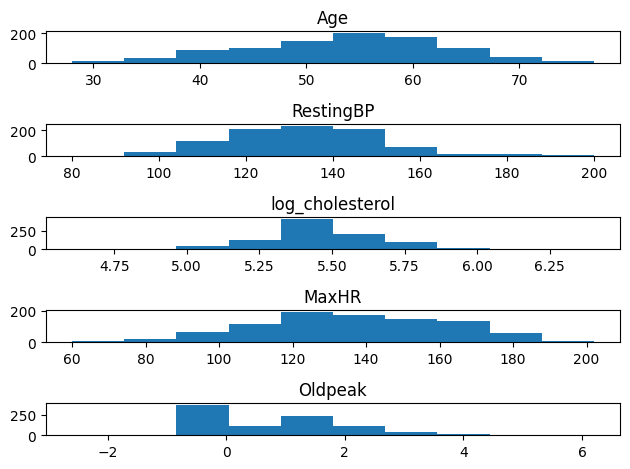

In [11]:
import numpy as np

# RestingBP has values near 0 (impossible)
# Changing to mean
df['RestingBP'] = df['RestingBP'].astype(float)
mean = df.loc[df['RestingBP'] >= 30, 'RestingBP'].mean()
df.loc[df['RestingBP'] < 30, 'RestingBP'] = mean

# Cholesterol has 0 values (impossible)
df['Cholesterol'] = df['Cholesterol'].astype(float)
mean = df.loc[df['Cholesterol'] >= 100, 'Cholesterol'].mean()
df.loc[df['Cholesterol'] < 100, 'Cholesterol'] = mean

# Cholesterol is long tailed
df['log_cholesterol'] = np.log(df['Cholesterol']) # dont need +1 as no 0 values


# Checking they look better
continuous_col = ['Age', 'RestingBP', 'log_cholesterol', 'MaxHR', 'Oldpeak']
fig, axs = plt.subplots(nrows = len(continuous_col))

for count, col in enumerate(continuous_col):
  axs[count].hist(df[col])
  axs[count].set_title(col)

plt.tight_layout()


In [12]:
# Normalising variables so that they are 0-1
for col in continuous_col:
  max = df[col].max()
  df[f'normalised_{col}'] = df[col]/max

In [13]:
# Creating dummies for categorical variables
categorical_col = ['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope']
df = pd.get_dummies(df, columns=categorical_col)
df.columns



Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'log_cholesterol',
       'normalised_Age', 'normalised_RestingBP', 'normalised_log_cholesterol',
       'normalised_MaxHR', 'normalised_Oldpeak', 'Sex_F', 'Sex_M',
       'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [14]:
# Changing to bool
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})

In [72]:
using_cols = ['FastingBS', 'ExerciseAngina', 'log_cholesterol',
       'normalised_Age', 'normalised_RestingBP', 'normalised_log_cholesterol',
       'normalised_MaxHR', 'Sex_F', 'Sex_M',
       'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up', 'normalised_Oldpeak', 'HeartDisease'] # last needs to be dependent

cleaned_df = df[using_cols].astype(float) # as type float changes bools (True, False) to float (1.0, 0.0)

cleaned_df.head()


,FastingBS,ExerciseAngina,log_cholesterol,normalised_Age,normalised_RestingBP,normalised_log_cholesterol,normalised_MaxHR,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,normalised_Oldpeak,HeartDisease
0,0.0,0.0,5.666427,0.519481,0.70,0.885114,0.851485,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.0
1,0.0,0.0,5.192957,0.636364,0.80,0.811157,0.772277,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.161290,1.0
2,0.0,0.0,5.645447,0.480519,0.65,0.881837,0.485149,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.0
3,0.0,1.0,5.365976,0.623377,0.69,0.838183,0.534653,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.241935,1.0
4,0.0,0.0,5.273000,0.701299,0.75,0.823659,0.603960,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.000000,0.0


Splitting into testing and training data

In [73]:
from fastai.data.transforms import RandomSplitter

# Get train/validation row indices
trn_idx, val_idx = RandomSplitter(seed=42)(cleaned_df)

# Split target and features correctly
trn_dep, val_dep = cleaned_df.iloc[trn_idx].HeartDisease, cleaned_df.iloc[val_idx].HeartDisease
trn_indep, val_indep = cleaned_df.drop(columns='HeartDisease').iloc[trn_idx], cleaned_df.drop(columns='HeartDisease').iloc[val_idx]

Changing to PyTorch tensors

In [74]:
import torch
from torch import tensor

t_trn_dep = tensor(trn_dep.values, dtype=torch.float32)
t_trn_indep = tensor(trn_indep.values, dtype=torch.float32)

t_val_dep = tensor(val_dep.values, dtype=torch.float32)
t_val_indep = tensor(val_indep.values, dtype=torch.float32)

In [75]:
t_trn_indep.shape

torch.Size([735, 20])

Creating Coefficients

In [76]:
torch.manual_seed(25)

n_coeff = t_trn_indep.shape[1] # number of coefficients equal to number of input columns
coeffs = torch.rand(n_coeff)-0.5 # create random numbers -.5 -> .5
coeffs

tensor([ 0.2518, -0.3071, -0.4371,  0.4118, -0.1172, -0.2010,  0.0933, -0.2089,
        -0.2584,  0.0582, -0.4519, -0.1503, -0.1480,  0.4528, -0.4716,  0.3488,
        -0.1053,  0.0181,  0.4726,  0.3813])

Using matrix multiplication to multiply indepedents by coefficients

In [77]:
prediction = t_trn_indep@coeffs

Finding error between output and independent variable

In [78]:
loss = torch.abs(prediction-t_trn_dep).mean()
loss

tensor(3.1200)

Defining functions to make easier

In [79]:
def calc_preds(indepenents, coefficients):
  ''' Takes two tensors and matrix multiplies to generate predictions'''
  return  indepenents@coefficients

def calc_loss(independents, coefficients, dependents):
  ''' Takes three tensors, calculates loss after one multiplication of coefficients'''
  predictions = calc_preds(independents, coefficients)
  return torch.abs(predictions-dependents).mean()

Gradient descent

In [80]:
# One pass to get grads
coeffs.requires_grad_()
loss = calc_loss(t_trn_indep, coeffs, t_trn_dep)
loss.backward() # calculate gradients
grads = coeffs.grad
grads # after using, need to use coeffs.grad.zero_() otherwise they add together

tensor([-0.2313, -0.3973, -5.4715, -0.6928, -0.6615, -0.8547, -0.6777, -0.2095,
        -0.7905, -0.5333, -0.1850, -0.2286, -0.0531, -0.2082, -0.6027, -0.1891,
        -0.0612, -0.5088, -0.4299, -0.1405])

In [81]:
# Creating a function
def train_step(independents, coefficients, dependents, lr):
  coefficients.requires_grad_()
  loss = calc_loss(independents, coefficients, dependents)
  loss.backward()
  with torch.no_grad():
    coefficients -= coefficients.grad * lr
    coefficients.grad.zero_()
  return loss, coefficients

Epoch 0 Loss: 0.899678647518158
Epoch 300 Loss: 0.2541220784187317
Epoch 600 Loss: 0.235038161277771
Epoch 900 Loss: 0.22884336113929749
Epoch 1200 Loss: 0.22355979681015015
Epoch 1500 Loss: 0.2185811847448349
Epoch 1800 Loss: 0.2139422744512558
Epoch 2100 Loss: 0.20962779223918915
Epoch 2400 Loss: 0.2058509886264801
Epoch 2700 Loss: 0.2051757425069809


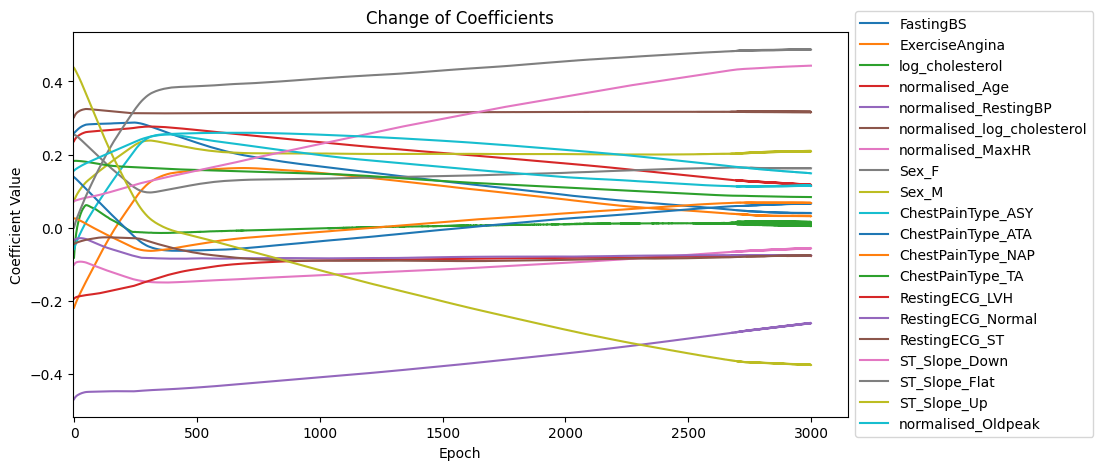

In [93]:
# Creating a loop, plotting coefficients
torch.manual_seed(1)
coeffs = torch.rand(n_coeff)-0.5
history = []
for i in range(3000):
  loss, coeffs = train_step(t_trn_indep, coeffs, t_trn_dep, 0.005)
  history.append(coeffs.clone())
  if i%300 == 0:
    print(f'Epoch {i} Loss: {loss}')

history = torch.stack(history)
# Plot coefficient evolution
plt.figure(figsize=(10, 5))
for j in range(n_coeff):
    plt.plot(history[:, j].detach().numpy(), label=f'{using_cols[j]}')
plt.xlabel('Epoch')
plt.xlim(-5)
plt.ylabel('Coefficient Value')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Change of Coefficients Values')
plt.show()

Observing Coefficients

In [91]:
def show_coeffs(): return (zip(using_cols[:-1], coeffs.requires_grad_(False)))
coeff_dict = show_coeffs()
for element in coeff_dict:
  print(element)

''' Shows the weight of each variable. The greater the number, the larger the impact
    +ve means more likely to have stroke, -ve means less likely
'''

('FastingBS', tensor(0.0400))
('ExerciseAngina', tensor(0.0316))
('log_cholesterol', tensor(0.0045))
('normalised_Age', tensor(0.1165))
('normalised_RestingBP', tensor(-0.2613))
('normalised_log_cholesterol', tensor(0.3157))
('normalised_MaxHR', tensor(-0.0566))
('Sex_F', tensor(0.1627))
('Sex_M', tensor(0.2085))
('ChestPainType_ASY', tensor(0.1144))
('ChestPainType_ATA', tensor(0.0661))
('ChestPainType_NAP', tensor(0.0678))
('ChestPainType_TA', tensor(0.0838))
('RestingECG_LVH', tensor(-0.0771))
('RestingECG_Normal', tensor(-0.0759))
('RestingECG_ST', tensor(-0.0759))
('ST_Slope_Down', tensor(0.4431))
('ST_Slope_Flat', tensor(0.4870))
('ST_Slope_Up', tensor(-0.3751))
('normalised_Oldpeak', tensor(0.1489))


' Shows the weight of each variable. The greater the number, the larger the impact\n    +ve means more likely to have stroke, -ve means less likely\n'

Finding accuracy of model

In [92]:
raw_preds = calc_preds(t_val_indep, coeffs)
sigmoid_preds = torch.sigmoid(raw_preds) # special exponential function to get 0-1
preds = (sigmoid_preds > 0.5).int() # if element > 0.5 then 1, otherwise 0

# Correct Predictions
correct = (preds == t_val_dep).int().sum()

# False positives
false_pos = ((preds == 1) & (t_val_dep == 0)).int().sum()

# False negatives
false_neg = ((preds == 0) & (t_val_dep == 1)).int().sum()

print(f'Accuracy = {correct/len(t_val_dep)*100:.2f}%')
print(f'False positives = {false_pos}')
print(f'False negatives = {false_neg}')
print(f'Out of total {len(t_val_dep)}')

Accuracy = 73.77%
False positives = 45
False negatives = 3
Out of total 183
